In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# Membaca data dari file CSV
data = pd.read_csv('drive/MyDrive/PK/updated soil data.csv')

# Membagi data menjadi atribut dan label
X = data.drop(columns=['tanaman'])
y = data['tanaman']

# Menerapkan one-hot encoding pada kolom 'jenis tanah'
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['jenis tanah'])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melakukan validasi silang 10 lipatan
scores = cross_val_score(model, X_train, y_train, cv=10)

for i, score in enumerate(scores):
    print(f"Fold {i+1} - Accuracy: {score}")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

joblib.dump(model, "model_dt.sav")
joblib.dump(column_transformer, "column_transformer.sav")

Fold 1 - Accuracy: 0.7231638418079096
Fold 2 - Accuracy: 0.7897727272727273
Fold 3 - Accuracy: 0.7613636363636364
Fold 4 - Accuracy: 0.7727272727272727
Fold 5 - Accuracy: 0.8011363636363636
Fold 6 - Accuracy: 0.7215909090909091
Fold 7 - Accuracy: 0.7272727272727273
Fold 8 - Accuracy: 0.75
Fold 9 - Accuracy: 0.7386363636363636
Fold 10 - Accuracy: 0.7329545454545454
Cross-Validation Scores: [0.72316384 0.78977273 0.76136364 0.77272727 0.80113636 0.72159091
 0.72727273 0.75       0.73863636 0.73295455]
Mean Accuracy: 0.7518618387262455


['column_transformer.sav']

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Visualisasi distribusi label (Keseluruhan)
flat_labels = pd.concat([pd.Series(y_train), pd.Series(y_test)])
plt.figure(figsize=(10, 6))
plt.hist(flat_labels, bins=np.arange(len(set(flat_labels)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(flat_labels))), set(flat_labels))
plt.title('Distribusi Label (Keseluruhan)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi label pada test set
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=np.arange(len(set(y_test)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(y_test))), set(y_test))
plt.title('Distribusi Label (Test Set)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o')
plt.title('10-fold Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature ranking:
1. Feature 'intensitas cahaya' (0.3874)
2. Feature 'kelembapan' (0.3408)
3. Feature 'ph' (0.1533)
4. Feature 'jenis tanah_humus' (0.0526)
5. Feature 'jenis tanah_andosol' (0.0298)
6. Feature 'jenis tanah_aluvial' (0.0208)
7. Feature 'jenis tanah_latosol' (0.0153)


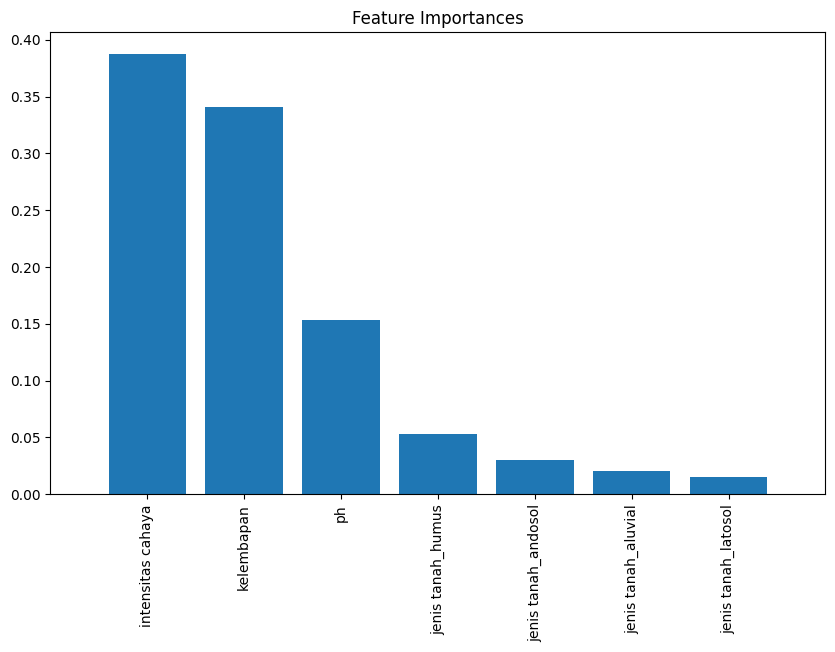

In [ ]:
import numpy as np

# Get the feature names from the one-hot encoder
encoder_feature_names = column_transformer.named_transformers_['encoder'].get_feature_names_out(['jenis tanah'])

# Get the other feature names
other_feature_names = X.drop(columns=['jenis tanah']).columns

# Combine the feature names
feature_names = np.concatenate([encoder_feature_names, other_feature_names])

# Get the feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(len(importances)):
    print(f"{i + 1}. Feature '{feature_names[indices[i]]}' ({importances[indices[i]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

In [ ]:
dt_model = joblib.load("model_dt.pkl")
column_transformer_dt = joblib.load("column_transformer.sav")

input_data = {
    "kelembapan":63,
    "intensitas cahaya":280,
    "ph":6.657,
    "jenis tanah":"Aluvial"
}

input_df = pd.DataFrame([input_data])
input_encoded = column_transformer.transform(input_df)

model.predict(input_encoded)

array(['Cabai'], dtype=object)

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.12
albumentations                   1.4.11
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.22.0.34.13
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')